In [42]:
import pandas as pd
import nltk
import string
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv("/content/drive/MyDrive/data/youtoxic_english_1000.csv")

In [45]:
df = df[["CommentId", "Text", "IsToxic"]]

In [47]:
df.shape

(1000, 3)

In [48]:
df.head(5)

,CommentId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,\nDont you reckon them 'black lives matter' ba...,True
3,Ugg7Gd006w1MPngCoAEC,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,"The Arab dude is absolutely right, he should h...",False


In [49]:
for c in df[df["IsToxic"]==True]["Text"].head(5):
    print(c)

Law enforcement is not trained to shoot to apprehend.  They are trained to shoot to kill.  And I thank Wilson for killing that punk bitch.

Dont you reckon them 'black lives matter' banners being held by white cunts is  kinda patronizing and ironically racist. could they have not come up with somethin better.. or is it just what white folks do to give them selves pride. 'ooo look at me im being nice for the black people' why does it always have to be about race actually the whole world is pussyfootin around for fear of being racist. its fuckin daft man.
here people his facebook is https://www.facebook.com/bassem.masri.520 he has ties with isis and other terrorist groups he is a muslim extremist 
Check out this you tube post. "Black man goes on an epic rant against Ferguson rioters."

Although his message is delivered with childish, cartoon-ish emotions.... He is one of the very few African American's who gets it.
I would LOVE to see this pussy go to Staten Island and spit on a cop. I w

In [50]:
df.iloc[1]["Text"]

'Law enforcement is not trained to shoot to apprehend. \xa0They are trained to shoot to kill. \xa0And I thank Wilson for killing that punk bitch.'

In [51]:
df["IsToxic"].iloc[1]

True

In [52]:
for c in df[df["IsToxic"]==False]["Text"].head(5):
    print(c)

If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.  To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation.  The guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more.  He was never out to have a reasonable discussion.  Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool.  How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate.  By the way, since when did police brutality become an epidemic?  I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on, because there's no measurable amount of people that honestly witnessed this incident, so

In [53]:
train_df, test_df = train_test_split(df, test_size=500)
test_df.shape

(500, 3)

In [54]:
test_df["IsToxic"].value_counts()

False    257
True     243
Name: IsToxic, dtype: int64

In [55]:
train_df["IsToxic"].value_counts()

False    281
True     219
Name: IsToxic, dtype: int64

In [56]:
sentence_example = df.iloc[1]["Text"]
tokens = word_tokenize(sentence_example, language="english")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
english_stop_words = stopwords.words("english")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in english_stop_words]
snowball = SnowballStemmer(language="english")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [58]:
print(f"Input text: {sentence_example}")
print("-----------------")
print(f"Tokens: {tokens}")
print("-----------------")
print(f"Tokens without punctuation: {tokens_without_punctuation}")
print("-----------------")
print(f"Tokens without stop_words and punctuation: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Stemmed tokens: {stemmed_tokens}")

Input text: Law enforcement is not trained to shoot to apprehend.  They are trained to shoot to kill.  And I thank Wilson for killing that punk bitch.
-----------------
Tokens: ['Law', 'enforcement', 'is', 'not', 'trained', 'to', 'shoot', 'to', 'apprehend', '.', 'They', 'are', 'trained', 'to', 'shoot', 'to', 'kill', '.', 'And', 'I', 'thank', 'Wilson', 'for', 'killing', 'that', 'punk', 'bitch', '.']
-----------------
Tokens without punctuation: ['Law', 'enforcement', 'is', 'not', 'trained', 'to', 'shoot', 'to', 'apprehend', 'They', 'are', 'trained', 'to', 'shoot', 'to', 'kill', 'And', 'I', 'thank', 'Wilson', 'for', 'killing', 'that', 'punk', 'bitch']
-----------------
Tokens without stop_words and punctuation: ['Law', 'enforcement', 'trained', 'shoot', 'apprehend', 'They', 'trained', 'shoot', 'kill', 'And', 'I', 'thank', 'Wilson', 'killing', 'punk', 'bitch']
-----------------
Stemmed tokens: ['law', 'enforc', 'train', 'shoot', 'apprehend', 'they', 'train', 'shoot', 'kill', 'and', 'i', '

In [59]:
snowball = SnowballStemmer(language="english")
english_stop_words = stopwords.words("english")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="english")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in english_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [60]:
tokenize_sentence(sentence_example)

['law',
 'enforc',
 'train',
 'shoot',
 'apprehend',
 'they',
 'train',
 'shoot',
 'kill',
 'and',
 'i',
 'thank',
 'wilson',
 'kill',
 'punk',
 'bitch']

In [61]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [62]:
features = vectorizer.fit_transform(train_df["Text"])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [63]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df["IsToxic"])

LogisticRegression(random_state=0)

In [64]:
train_df["Text"].iloc[0]

'*Monkey screamin bout honkies intensifies*'

In [65]:
model.predict(features[0])

array([ True])

In [66]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
])

In [67]:
model_pipeline.fit(train_df["Text"], train_df["IsToxic"])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f85dab62ee0>)),
                ('model', LogisticRegression(random_state=0))])

In [68]:
model_pipeline.predict(["Hello, everything is fine"])

array([False])

In [69]:
model_pipeline.predict(["Bullshit"])

array([ True])

In [70]:
precision_score(y_true=test_df["IsToxic"], y_pred=model_pipeline.predict(test_df["Text"]))

0.7786885245901639

In [71]:
recall_score(y_true=test_df["IsToxic"], y_pred=model_pipeline.predict(test_df["Text"]))

0.39094650205761317

In [72]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["IsToxic"], probas_pred=model_pipeline.predict_proba(test_df["Text"])[:, 1])

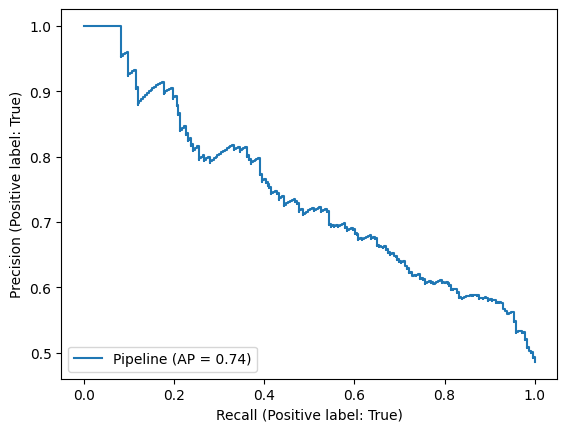

In [73]:
PrecisionRecallDisplay.from_estimator(model_pipeline, X=test_df["Text"], y=test_df["IsToxic"])


In [74]:
np.where(prec > 0.95)

(array([471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
        484, 485, 486, 487, 488, 489, 490, 491, 492]),)

In [75]:
thresholds[471]

0.6623575816789601

In [76]:
precision_score(y_true=test_df["IsToxic"], y_pred=model_pipeline.predict_proba(test_df["Text"])[:, 1] > thresholds[471])

0.9583333333333334

In [77]:
recall_score(y_true=test_df["IsToxic"], y_pred=model_pipeline.predict_proba(test_df["Text"])[:, 1] > thresholds[471])

0.09465020576131687